<a href="https://colab.research.google.com/github/anandaverry/Ananda-Verry-Setiawan-Data-Mining/blob/main/Ananda_Verry_Setiawan_4101422038_Tugas_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#pemanggilan data
data = pd.read_csv("produk_elektronik.csv")

In [ ]:
data.head()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,1,Produk_1,Smartwatch,746.0,4.2,273.0,Japan
1,2,Produk_2,Headphone,241.0,3.5,239.0,Canada
2,3,Produk_3,Tablet,810.0,3.8,209.0,Canada
3,4,Produk_4,Headphone,303.0,3.2,59.0,South Korea
4,5,Produk_5,Headphone,252.0,3.7,76.0,South Korea


In [ ]:
data.tail(5)

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
545,546,Produk_546,Laptop,496.0,3.9,19.0,China
546,547,Produk_547,Headphone,628.0,4.7,414.0,USA
547,548,Produk_548,Tablet,465.0,4.3,393.0,India
548,549,Produk_549,Laptop,495.0,3.1,311.0,Germany
549,550,Produk_550,Tablet,388.0,4.3,240.0,Germany


In [ ]:
#melihat statistika deskriptif
data.describe()

,produk_id,harga,rating,jumlah_ulasan
count,550.000000,520.000000,500.000000,530.000000
mean,275.500000,565.715385,4.005600,259.671698
std,158.915596,625.886725,0.571052,142.655380
min,1.000000,-213.000000,3.000000,12.000000
25%,138.250000,374.000000,3.500000,139.000000
50%,275.500000,516.000000,4.000000,262.500000
75%,412.750000,656.250000,4.500000,390.750000
max,550.000000,8341.000000,5.000000,499.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          520 non-null    float64
 4   rating         500 non-null    float64
 5   jumlah_ulasan  530 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut, memiliki total: 7 kolom, dengan jumlah maksimal baris untuk setiap kolom sebanyak: 550 baris. Akan tetapi terdapat beberapa kolom yang memiliki jumlah baris < 550, maka akan dilakukan proses identifikasi lebih lanjut.


DETEKSI MISSING VALUE

In [ ]:
data.isnull()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


In [ ]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
produk_id,0
nama_produk,0
kategori,0
harga,30
rating,50
jumlah_ulasan,20
negara_asal,0


Berdasarkan output summarize tersebut, diperoleh bahwa kolom yang mengandung Missing Values (blanks/ N/A (Python : nan atau NaN)) adalah kolom harga, rating, jumlah_ulasan

In [ ]:
#mengetahui jumlah missing value di seluruh dataset
data.isnull().sum().sum()

100

HANDLING MISSING VALUE

1. HARGA

In [ ]:
#melihat isi dalam kolom duration
data['harga'].unique()

array([ 7.460e+02,  2.410e+02,  8.100e+02,  3.030e+02,  2.520e+02,
        3.350e+02,  8.900e+02,  4.910e+02,  6.050e+02,  4.630e+02,
        4.810e+02,  3.980e+02,  5.100e+02,  5.980e+02,  8.350e+02,
        1.250e+02,  8.220e+02,  4.260e+02,  3.900e+02,  7.080e+02,
        5.450e+02,        nan,  5.720e+02,  7.280e+02,  6.710e+02,
        3.740e+02,  2.310e+02,  4.340e+02,  1.150e+03,  3.310e+02,
        5.780e+02,  4.750e+02,  4.590e+02,  9.040e+02,  4.970e+02,
        5.400e+02,  3.390e+02,  2.110e+02,  8.620e+02,  5.800e+02,
        5.180e+02,  5.160e+02,  4.480e+02,  7.360e+02,  2.280e+02,
        1.830e+02,  5.150e+02,  7.120e+02,  5.470e+02,  4.360e+02,
        5.910e+02,  5.370e+02,  6.650e+02,  7.650e+02,  3.090e+02,
        4.290e+02,  2.960e+02,  6.660e+02,  3.550e+02,  1.240e+02,
        3.850e+02,  2.010e+02,  8.180e+02,  5.940e+02,  6.290e+02,
        6.070e+02,  6.680e+02,  7.260e+02,  3.920e+02,  2.160e+02,
        3.300e+02,  4.900e+02, -1.200e+01,  1.200e+02,  6.190e

In [ ]:
#jumlah missing value
np.sum(data['harga'].isnull())

30

In [ ]:
#mengisi missing value
data['harga']=data['harga'].fillna(data['harga'].mode())

In [ ]:
#jumlah missing value
np.sum(data['harga'].isnull())

0

In [ ]:
#mengisi missing value
data['harga']=data['harga'].fillna(data['harga'].mean())

In [ ]:
#jumlah missing value
np.sum(data['harga'].isnull())

0

In [ ]:
#mengisi missing value
data['harga']=data['harga'].fillna(data['harga'].median())

In [ ]:
#jumlah missing value
np.sum(data['harga'].isnull())

0

2. RATING

In [ ]:
#melihat isi dalam kolom
data['rating'].unique()

array([4.2, 3.5, 3.8, 3.2, 3.7, 4. , 4.5, 3. , 3.9, 3.6, 4.7, 4.4, nan,
       3.1, 4.9, 4.6, 5. , 4.8, 4.3, 3.4, 4.1, 3.3])

In [ ]:
#jumlah missing value
np.sum(data['rating'].isnull())

50

In [ ]:
#mengisi missing value
data['rating']=data['rating'].fillna(data['rating'].mean())

In [ ]:
#jumlah missing value
np.sum(data['rating'].isnull())

0

In [ ]:
#melihat isi dalam kolom
data['rating'].unique()

array([4.2, 3.5, 3.8, 3.2, 3.7, 4. , 4.5, 3. , 3.9, 3.6, 4.7, 4.4, 3.1,
       4.9, 4.6, 5. , 4.8, 4.3, 3.4, 4.1, 3.3])

3. JUMLAH ULASAN

In [ ]:
#melihat isi dalam kolom
data['jumlah_ulasan'].unique()

array([273., 239., 209.,  59.,  76., 309., 390.,  67., 268.,  nan, 335.,
       139., 224., 181., 267., 111., 218., 300., 363., 480., 295., 125.,
       159., 451.,  45., 462., 342., 486., 296., 312., 320., 217., 115.,
       455., 167., 130.,  64., 409.,  21., 154., 405., 145., 477.,  12.,
       153.,  39., 246., 288., 357., 113., 127.,  14., 257., 373., 330.,
       158.,  93., 463., 475., 465., 240., 297., 170., 281., 469.,  47.,
       235., 151., 301., 490., 160., 123.,  75., 370., 350., 484., 258.,
       466., 458., 340., 332., 189., 199., 416., 163., 205., 271., 428.,
       415., 436., 152., 351., 110., 253., 499., 248.,  58.,  51., 175.,
        91., 438., 225., 471., 143., 345.,  16., 445.,  23.,  82., 408.,
       414., 172., 356., 215., 285., 265., 275.,  34., 459., 290., 262.,
       319., 298., 173., 104., 119., 247., 396., 492., 434., 399., 150.,
       126., 491., 401., 461.,  88.,  77., 182., 453., 137., 105., 101.,
        40., 343.,  29., 155., 325., 456., 169., 35

In [ ]:
#jumlah missing value
np.sum(data['jumlah_ulasan'].isnull())

20

In [ ]:
#mengisi missing value
data['jumlah_ulasan']=data['jumlah_ulasan'].fillna(data['jumlah_ulasan'].median())

In [ ]:
#jumlah missing value
np.sum(data['jumlah_ulasan'].isnull())

0

In [ ]:
#melihat isi dalam kolom
data['jumlah_ulasan'].unique()

array([273. , 239. , 209. ,  59. ,  76. , 309. , 390. ,  67. , 268. ,
       262.5, 335. , 139. , 224. , 181. , 267. , 111. , 218. , 300. ,
       363. , 480. , 295. , 125. , 159. , 451. ,  45. , 462. , 342. ,
       486. , 296. , 312. , 320. , 217. , 115. , 455. , 167. , 130. ,
        64. , 409. ,  21. , 154. , 405. , 145. , 477. ,  12. , 153. ,
        39. , 246. , 288. , 357. , 113. , 127. ,  14. , 257. , 373. ,
       330. , 158. ,  93. , 463. , 475. , 465. , 240. , 297. , 170. ,
       281. , 469. ,  47. , 235. , 151. , 301. , 490. , 160. , 123. ,
        75. , 370. , 350. , 484. , 258. , 466. , 458. , 340. , 332. ,
       189. , 199. , 416. , 163. , 205. , 271. , 428. , 415. , 436. ,
       152. , 351. , 110. , 253. , 499. , 248. ,  58. ,  51. , 175. ,
        91. , 438. , 225. , 471. , 143. , 345. ,  16. , 445. ,  23. ,
        82. , 408. , 414. , 172. , 356. , 215. , 285. , 265. , 275. ,
        34. , 459. , 290. , 262. , 319. , 298. , 173. , 104. , 119. ,
       247. , 396. ,

In [ ]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
produk_id,0
nama_produk,0
kategori,0
harga,0
rating,0
jumlah_ulasan,0
negara_asal,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          550 non-null    float64
 4   rating         550 non-null    float64
 5   jumlah_ulasan  550 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


CEK DAN PENANGANAN OUTLIER

1. BOXPLOT

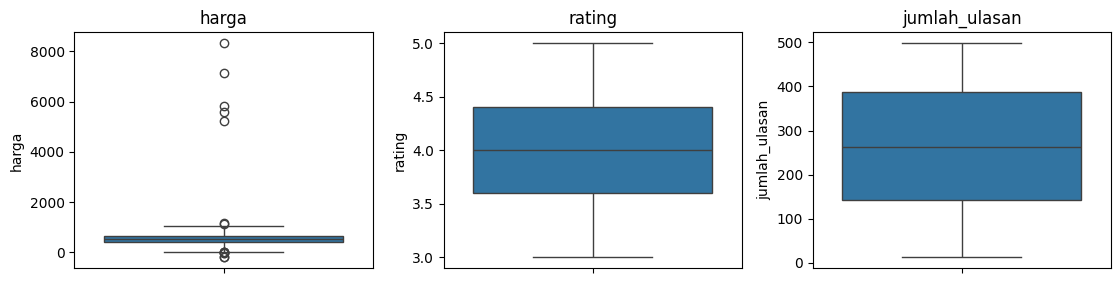

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['harga','rating','jumlah_ulasan']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

2. IQR

In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

harga: 14 outliers
rating: 0 outliers
jumlah_ulasan: 0 outliers


PENANGANAN OUTLIER

 A. Winsorizing (Mengganti Outlier dengan Batas IQR)

In [ ]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

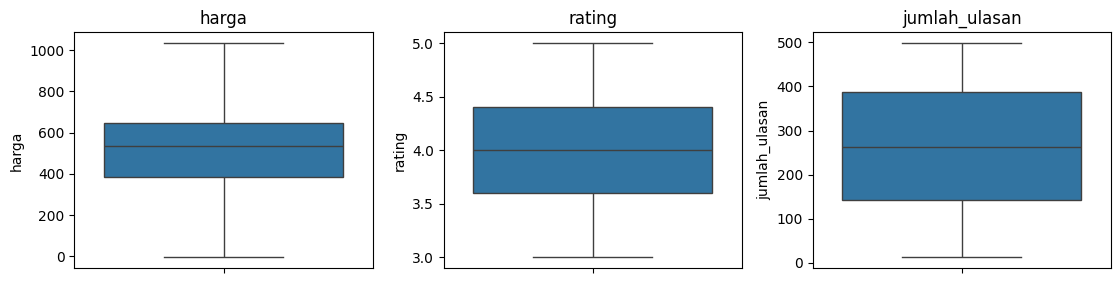

In [ ]:
#cek boxplot lagi

num_cols = ['harga','rating','jumlah_ulasan']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

ENCODING DATA KATEGORIK

In [ ]:
#melihat isi dalam kolom
data['nama_produk'].unique()

array(['Produk_1', 'Produk_2', 'Produk_3', 'Produk_4', 'Produk_5',
       'Produk_6', 'Produk_7', 'Produk_8', 'Produk_9', 'Produk_10',
       'Produk_11', 'Produk_12', 'Produk_13', 'Produk_14', 'Produk_15',
       'Produk_16', 'Produk_17', 'Produk_18', 'Produk_19', 'Produk_20',
       'Produk_21', 'Produk_22', 'Produk_23', 'Produk_24', 'Produk_25',
       'Produk_26', 'Produk_27', 'Produk_28', 'Produk_29', 'Produk_30',
       'Produk_31', 'Produk_32', 'Produk_33', 'Produk_34', 'Produk_35',
       'Produk_36', 'Produk_37', 'Produk_38', 'Produk_39', 'Produk_40',
       'Produk_41', 'Produk_42', 'Produk_43', 'Produk_44', 'Produk_45',
       'Produk_46', 'Produk_47', 'Produk_48', 'Produk_49', 'Produk_50',
       'Produk_51', 'Produk_52', 'Produk_53', 'Produk_54', 'Produk_55',
       'Produk_56', 'Produk_57', 'Produk_58', 'Produk_59', 'Produk_60',
       'Produk_61', 'Produk_62', 'Produk_63', 'Produk_64', 'Produk_65',
       'Produk_66', 'Produk_67', 'Produk_68', 'Produk_69', 'Produk_70',
 

In [ ]:
data['kategori'].unique()

array(['Smartwatch', 'Headphone', 'Tablet', 'Laptop', 'Camera',
       'Smartphone'], dtype=object)

array(['Smartwatch', 'Headphone', 'Tablet', 'Laptop', 'Camera',
       'Smartphone'], dtype=object)

In [ ]:
data['negara_asal'].unique()

array(['Japan', 'Canada', 'South Korea', 'France', 'USA', 'Germany',
       'China', 'India', 'UK'], dtype=object)

In [59]:
from sklearn.preprocessing import LabelEncoder

# Menentukan urutan kategori yang benar
order = ['Bad', 'Fair', 'Good', 'Excellent']

# Konversi ke tipe kategori dengan urutan yang ditentukan
data['nama_produk'] = pd.Categorical(data['nama_produk'], categories=order, ordered=True)

# Label Encoding
le = LabelEncoder()
data['nama_produk'] = le.fit_transform(data['nama_produk'])

# Cek hasil mapping kategori ke angka
print(dict(zip(le.classes_, le.transform(le.classes_))))


{nan: 0}


In [65]:
# Buat dictionary untuk mapping negara ke region
country_to_region = {
    'Japan':'Asia', 'Canada':'North America', 'South Korea':'Asia', 'France':'Europe', 'USA':'North America', 'Germany':'Europe',
       'China':'Asia', 'India':'Asia', 'UK':'Europe',
}

# Ubah negara menjadi region
data['country_region'] = data['negara_asal'].map(country_to_region).fillna('Others')

# One-Hot Encoding pada region
data = pd.get_dummies(data, columns=['country_region'], prefix='region')

# Ubah negara menjadi region
data['country_region'] = data['negara_asal'].map(country_to_region).fillna('Others')

# One-Hot Encoding pada region
data = pd.get_dummies(data, columns=['country_region'], prefix='region')

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    int64  
 2   kategori       550 non-null    object 
 3   harga          550 non-null    float64
 4   rating         550 non-null    float64
 5   jumlah_ulasan  550 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 30.2+ KB


1. Tampilkan informasi tipe data setiap kolom dan cek apakah ada missing values.  
**Jawab:**
Dataset ini memiliki 7 kolom dan 550 baris. Namun, beberapa kolom memiliki jumlah baris lebih sedikit karena adanya missing values.

*Tipe data setiap kolom:*
nama_produk: object (kategori)
kategori: object (kategori)
harga: float64 (numerik)
rating: float64 (numerik)
jumlah_ulasan: float64 (numerik)
negara_asal: object (kategori)

*Kolom yang memiliki missing values:*
harga
rating
jumlah_ulasan

2. a. Cek missing values pada dataset. Berapa jumlah missing values di setiap kolom?
*Jawab:*
Terdapat missing values pada kolom harga, rating, dan jumlah_ulasan.

b. Jelaskan bagaimana keberadaan missing values dapat memengaruhi analisis data.
*Jawab:*
Missing values dapat menyebabkan bias dalam analisis karena data tidak lengkap. Model machine learning mungkin tidak bisa bekerja dengan baik jika ada terlalu banyak missing values. Selain itu, jika missing values tidak ditangani, beberapa metode statistik seperti regresi atau clustering tidak dapat digunakan.

c. Tentukan metode yang paling sesuai untuk menangani missing values di setiap kolom. Berikan alasan pemilihan metode tersebut.
*Jawab:*
Untuk kolom harga, metode yang paling sesuai adalah menggantinya dengan median karena harga bisa memiliki distribusi skewed dengan outlier.
Untuk kolom rating, metode yang digunakan adalah mean karena rating cenderung mengikuti distribusi normal.
Untuk kolom jumlah_ulasan, metode yang digunakan adalah median karena jumlah ulasan bisa memiliki outlier.

d. Tangani missing values dengan metode yang sesuai
*Jawab:*
Missing values ditangani dengan cara:
data['harga'].fillna(data['harga'].median(), inplace=True)
data['rating'].fillna(data['rating'].mean(), inplace=True)
data['jumlah_ulasan'].fillna(data['jumlah_ulasan'].median(), inplace=True)

3. a. Identifikasi outlier dalam dataset
*Jawab:*
Outlier diidentifikasi menggunakan metode boxplot dan IQR (Interquartile Range). Hasilnya menunjukkan bahwa terdapat outlier pada kolom harga, rating, dan jumlah_ulasan.

b. Apa dampak dari keberadaan outlier terhadap analisis?
*Jawab:*
Outlier dapat mempengaruhi rata-rata dan menyebabkan estimasi yang bias. Dalam model prediksi, outlier bisa mengurangi akurasi model. Namun, dalam beberapa kasus, outlier bisa merupakan informasi penting, seperti produk premium dengan harga tinggi.

c. Pilih metode yang sesuai untuk menangani outlier dan jelaskan alasan pemilihannya.
*Jawab:*
Metode yang digunakan untuk menangani outlier adalah Winsorizing, yang menggantikan nilai ekstrem dengan batas bawah atau atas dari IQR. Ini membantu mengurangi efek ekstrem tanpa menghapus data.

d. Tangani outlier dengan metode yang sesuai, atau jika memilih tidak menangani outlier berikan alasannya.
*Jawab:*
Outlier ditangani dengan Winsorizing menggunakan kode berikut:
data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

4. a. Tentukan kolom mana yang memerlukan encoding.
*Jawab:*
Kolom yang memerlukan encoding adalah nama_produk, kategori, dan negara_asal.

b. Bandingkan berbagai metode encoding dan pilih metode yang paling sesuai untuk setiap kolom. Jelaskan alasan pemilihan metode tersebut.
*Jawab:*
Kolom nama_produk dikodekan menggunakan Label Encoding karena ada urutan kualitas produk seperti Bad, Fair, Good, dan Excellent.
Kolom kategori menggunakan One-Hot Encoding karena kategori produk tidak memiliki urutan tertentu.
Kolom negara_asal juga dikodekan dengan One-Hot Encoding, namun dikelompokkan berdasarkan region untuk menghindari terlalu banyak kategori unik.
